In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Sequential, callbacks
from tensorflow.train import AdamOptimizer
from tensorflow.data import Dataset


In [2]:
df = pd.read_csv('weight-height.csv')
x = df['Height']
y = df['Weight']

# dataset = Dataset.from_tensor_slices((x,y))

x.shape

(10000,)

In [3]:
adam = AdamOptimizer(learning_rate=0.00001)

In [4]:
Model = Sequential()

Model.add(Dense(10, input_shape=(1,), activation='linear'))
Model.add(Dense(10, activation='linear'))
Model.add(Dense(1, activation='linear'))
Model.compile(adam, loss='mean_squared_error', metrics=['accuracy'])

Model.summary()

W0921 13:56:25.965707 139697711560512 deprecation.py:506] From /home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [5]:
es = callbacks.EarlyStopping(monitor='loss',min_delta=0.5, mode='min' , patience=10)

In [6]:
Model.fit(x, y, epochs=10000, batch_size=100, callbacks=[es])

Epoch 1/10000
10000/10000 [==============================] - 0s 26us/sample - loss: 19402.1951 - acc: 0.0000e+00
Epoch 2/10000
10000/10000 [==============================] - 0s 14us/sample - loss: 19098.7721 - acc: 0.0000e+00
Epoch 3/10000
10000/10000 [==============================] - 0s 11us/sample - loss: 18798.5579 - acc: 0.0000e+00
Epoch 4/10000
10000/10000 [==============================] - 0s 11us/sample - loss: 18501.1516 - acc: 0.0000e+00
Epoch 5/10000
10000/10000 [==============================] - 0s 10us/sample - loss: 18206.4754 - acc: 0.0000e+00
Epoch 6/10000
10000/10000 [==============================] - 0s 11us/sample - loss: 17914.3459 - acc: 0.0000e+00
Epoch 7/10000
10000/10000 [==============================] - 0s 11us/sample - loss: 17624.9196 - acc: 0.0000e+00
Epoch 8/10000
10000/10000 [==============================] - 0s 10us/sample - loss: 17337.9882 - acc: 0.0000e+00
Epoch 9/10000
10000/10000 [==============================] - 0s 12us/sample - loss: 17053.4865 -

10000/10000 [==============================] - 0s 9us/sample - loss: 3217.2514 - acc: 0.0000e+00
Epoch 74/10000
10000/10000 [==============================] - 0s 9us/sample - loss: 3085.4192 - acc: 0.0000e+00
Epoch 75/10000
10000/10000 [==============================] - 0s 9us/sample - loss: 2957.1417 - acc: 0.0000e+00
Epoch 76/10000
10000/10000 [==============================] - 0s 9us/sample - loss: 2832.3479 - acc: 0.0000e+00
Epoch 77/10000
10000/10000 [==============================] - 0s 9us/sample - loss: 2711.0555 - acc: 0.0000e+00
Epoch 78/10000
10000/10000 [==============================] - 0s 9us/sample - loss: 2593.3471 - acc: 0.0000e+00
Epoch 79/10000
10000/10000 [==============================] - 0s 9us/sample - loss: 2479.2177 - acc: 0.0000e+00
Epoch 80/10000
10000/10000 [==============================] - 0s 9us/sample - loss: 2368.6672 - acc: 0.0000e+00
Epoch 81/10000
10000/10000 [==============================] - 0s 9us/sample - loss: 2261.6882 - acc: 0.0000e+00
Epoch 8

In [7]:
Model.get_weights()

[array([[ 0.48139578,  0.48448187,  0.6536765 , -0.38347843,  0.35819137,
          0.30562958,  0.20912838, -0.24669345,  0.68701535, -0.02482897]],
       dtype=float32),
 array([ 0.10329785,  0.03596011,  0.09315413, -0.04778285,  0.08712114,
         0.09914449,  0.1000681 , -0.0942376 ,  0.03650304,  0.07570873],
       dtype=float32),
 array([[ 0.20961352, -0.12951964,  0.02848221,  0.6274246 ,  0.24722691,
         -0.1755914 , -0.4670004 ,  0.62764597, -0.16571712, -0.19140461],
        [ 0.111462  , -0.01266163,  0.17351668,  0.20997243, -0.2117302 ,
          0.25950846, -0.02768478,  0.4943484 , -0.21110448,  0.3309775 ],
        [-0.27345282, -0.3484537 , -0.2520352 , -0.09973338,  0.42515358,
         -0.48401642, -0.51653636,  0.41991058, -0.5856813 ,  0.5097245 ],
        [-0.34419197,  0.06437802,  0.6267084 ,  0.3302987 ,  0.11884344,
          0.34934512,  0.10558034,  0.02727858,  0.249093  , -0.5145718 ],
        [-0.2726382 ,  0.01088652, -0.5549793 , -0.01732344, 

In [8]:
Model.evaluate(x, y)

10000/10000 [==============================] - 0s 15us/sample - loss: 563.5074 - acc: 0.0000e+00


[563.507387109375, 0.0]

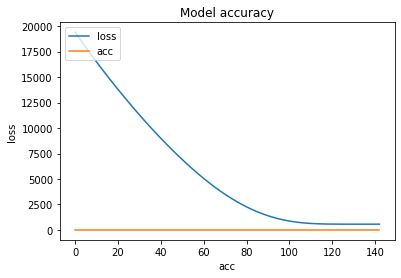

In [9]:
history = Model.history
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('loss')
plt.xlabel('acc')
plt.legend(['loss', 'acc'], loc='upper left')
plt.show()